# Take Home Problems 3 - Mariia Onokhina

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to show all outputs in a cell, not only last one


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url,sep=',')

In [3]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [4]:
df = df.drop_duplicates()

# Remove completely empty columns (if any)
df = df.dropna(axis=1, how='all')
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [7]:
# Convert to datetime
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['hour_beginning'])

In [8]:
# Ensure pedestrian counts are numeric
df['Pedestrians'] = pd.to_numeric(df['Pedestrians'], errors='coerce')

df['weather_summary'] = df['weather_summary'].fillna('unknown')

# Add weekday name and year columns
df['weekday'] = df['hour_beginning'].dt.day_name()
df['year'] = df['hour_beginning'].dt.year

In [9]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,weekday,year
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,unknown,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday,2019


1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Pedestrian Counts by Weekday (Brooklyn Bridge)')

Text(0.5, 0, 'Day of Week')

Text(0, 0.5, 'Total Pedestrian Count')

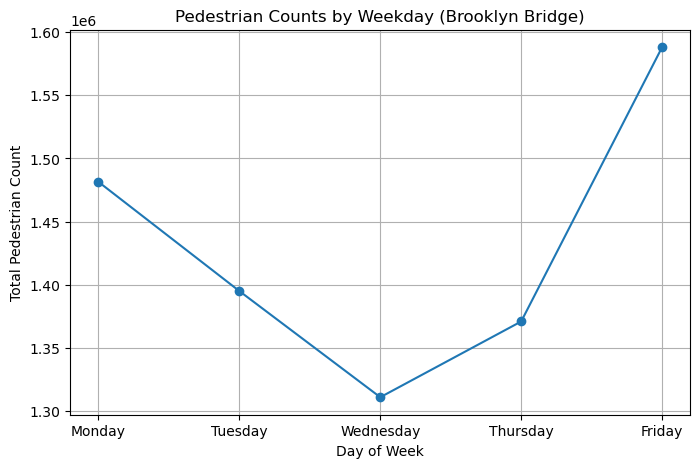

In [10]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_data = df[df['weekday'].isin(weekdays)]

weekday_counts = weekday_data.groupby('weekday')['Pedestrians'].sum().reindex(weekdays)

plt.figure(figsize=(8,5))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o')
plt.title('Pedestrian Counts by Weekday (Brooklyn Bridge)')
plt.xlabel('Day of Week')
plt.ylabel('Total Pedestrian Count')
plt.grid(True)
plt.show()

2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

,Pedestrians,temperature,precipitation
weather_summary,,,
partly-cloudy-day,1574.093627,66.173717,0.000176
clear-day,1382.183298,55.523708,0.000062
wind,679.000000,51.000000,0.000575
cloudy,543.225041,52.075014,0.001302
rain,229.822076,53.911038,0.056557


<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - 2019 Weather vs Pedestrian Counts (Brooklyn Bridge)')

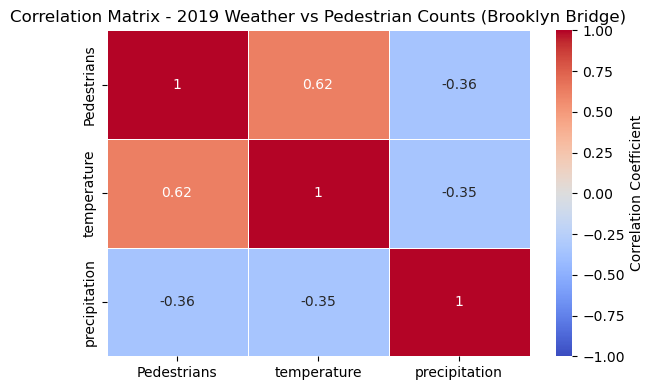

In [15]:
df_2019 = df[(df['year'] == 2019) & (df['location'] == 'Brooklyn Bridge')]

weather_grouped = (
    df_2019.groupby('weather_summary')[['Pedestrians', 'temperature', 'precipitation']]
    .mean()
    .sort_values(by='Pedestrians', ascending=False)
)

display(weather_grouped.head())

# Compute correlation matrix
corr_matrix = weather_grouped.corr()

# Plot correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix - 2019 Weather vs Pedestrian Counts (Brooklyn Bridge)')
plt.tight_layout()
plt.show()


3. Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

time_of_day
morning       614.543099
afternoon    1694.841305
evening       426.206776
night          13.001993
Name: Pedestrians, dtype: float64


<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Average Pedestrian Activity by Time of Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Average Pedestrians')

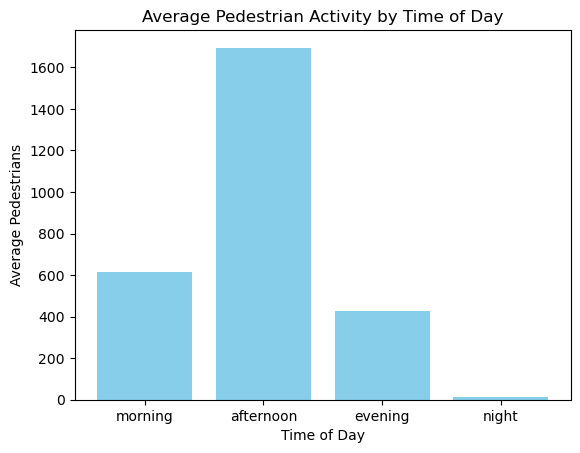

In [17]:
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time)

time_counts = df.groupby('time_of_day')['Pedestrians'].mean().reindex(['morning','afternoon','evening','night'])
print(time_counts)

plt.bar(time_counts.index, time_counts.values, color='skyblue')
plt.title('Average Pedestrian Activity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrians')
plt.show()
